In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
df = pd.read_csv('2019.csv')
df.shape

(156, 9)

In [2]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


**1. Problem statements. 
Load the data (It should have at least 100 rows.) and get familiar with it. Describe the data source and include its link. 5 points**

This dataset called 'World Happiness Report' rates the happiness of the citizens of different countries based on six categories, including life expectancy, freedom to make life choices and generosity. This particular set is the report for the year of 2019 for 156 countries. 
Link: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv

**List out three questions you want to investigate from this dataset. These questions could be a trend, a comparison between different groups of a categorical feature, a relationship between two variables, or a distribution of a numerical variable.  5 points**

1. Which top 5 countries have the highest score for generosity? Create a bar chart for this.
2.  How many countries have a GDP between 0.5 and 1.0? Which countries? 
3. Is there any correlation between generosity and GDP?

**2. Data cleaning.**

**Follow the data cleaning steps to clean the data. a. Drop any unwanted features if necessary. b. Address any missing values. c. Remove duplicates if necessary. d. Check the data type of each column. e. For categorical variables, check if there are any inconsistent inputs. d. For numeric variables, check any outliers.  20 points**

**a. Drop any unwanted features if necessary**

In [3]:
#no null present
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [4]:
remove = ['Perceptions of corruption']
new_df = df.drop(remove, inplace=False, axis=1)
new_df.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity']

**b. Address any missing values**

In [5]:
#no missing values found - same no. of rows
new_df.columns.dropna()
new_df.shape

(156, 8)

**c. Remove duplicates if necessary**

In [6]:
new_df_nodups = new_df.drop_duplicates()
new_df_nodups.shape
#no duplicates found

(156, 8)

**d. Check the data type of each column**

In [7]:
new_df_nodups.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
dtype: object

**e. For categorical variables, check if there are any inconsistent inputs**

In [8]:
# no inconsistent inputs found -> each row represents a different country

**f. For numeric variables, check any outliers**

In [9]:
new_df_no_outlier = new_df_nodups[new_df_nodups['Score']>4.000]
new_df_no_outlier.shape

(140, 8)

<AxesSubplot:>

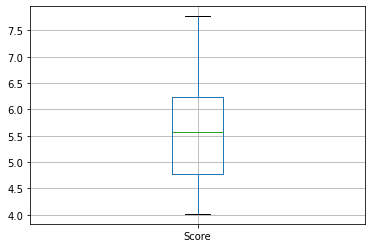

In [10]:
new_df_no_outlier.boxplot(column=['Score'])

**3. Exploratory data Analysis and Interpretation of the results.** 
**Question A:  20 points for each question
Process the data. Generate the result you want.
Create a graph to visualize the result. 
Interpret the result. Explain your findings.**

**a. Process the data. Generate the result you want.**

1. Which top 5 countries have the highest score for generosity? Create a bar chart for this.
2. How many countries have a GDP between 0.5 and 1.0? Which countries? List these countries from least Happiness Score to greatest. 
3. Is there any correlation between generosity and GDP?

In [11]:
#1. Which top 5 countries have the highest score for generosity?
top_five = df.nlargest(5, 'Generosity')
top_five

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


<function matplotlib.pyplot.show(close=None, block=None)>

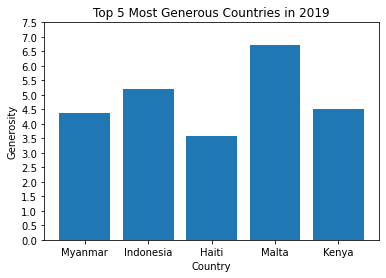

In [12]:
plt.bar(top_five.iloc[:,1], top_five.iloc[:,2])
plt.xlabel('Country')
plt.ylabel('Generosity')
plt.title('Top 5 Most Generous Countries in 2019')
plt.yticks(np.arange(0,8,0.5))

plt.show

In [13]:
# Which are the bottom 5 countries for generosity?
lowest_5 = df.nsmallest(5, 'Generosity')
lowest_5

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042


<function matplotlib.pyplot.show(close=None, block=None)>

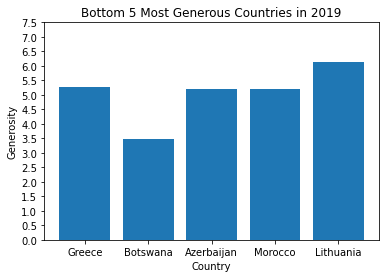

In [14]:
plt.bar(lowest_5.iloc[:,1], lowest_5.iloc[:,2])
plt.xlabel('Country')
plt.ylabel('Generosity')
plt.title('Bottom 5 Most Generous Countries in 2019')
plt.yticks(np.arange(0,8,0.5))

plt.show

Overall, it appears that the top 5 *most* generous countries are Myanmar, Indonesia, Haiti, Malta and Kenya, while the 5 *least* generous countries are Greece, Botswana, Azerbaijan, Morocco and Lithuania.

For the top 5 most generous countries, Haiti and Malta appear to be outliers, with Haiti being the lowest and Malta being the highest. This means that overall, Malta is the most generous country out of the 156 evaluated countries in the dataset.

For the 5 least generous countries, Botswana and Lithuania are outliers, with Botswana being the least generous country and Lithuania being more generous that the other 4. Overall, this lands Botswana being the lest generous country out of the 156 evaluated countries in the dataset. 

Let's try out correlations for the next question!

In [15]:
#2. How many countries have a GDP between 0.5 and 1.0?
#Which countries? 
#List these countries from least Happiness Score to greatest.
gdp_between = df.loc[(df['GDP per capita']>= 0.5)&(df['GDP per capita']<=1.0)]
len(gdp_between.index)

51

In [16]:
#51 countries have a GDP between 0.5 and 1.0. These countries are:
gdp_between['Country or region'].tolist()

['Guatemala',
 'El Salvador',
 'Uzbekistan',
 'Colombia',
 'Nicaragua',
 'Kosovo',
 'Ecuador',
 'Jamaica',
 'Honduras',
 'Bolivia',
 'Paraguay',
 'Peru',
 'Pakistan',
 'Philippines',
 'Moldova',
 'Bosnia and Herzegovina',
 'Mongolia',
 'North Macedonia',
 'Nigeria',
 'Kyrgyzstan',
 'Morocco',
 'Lebanon',
 'Indonesia',
 'Vietnam',
 'Bhutan',
 'Cameroon',
 'Ghana',
 'Ivory Coast',
 'Jordan',
 'Congo (Brazzaville)',
 'Laos',
 'South Africa',
 'Albania',
 'Venezuela',
 'Cambodia',
 'Palestinian Territories',
 'Namibia',
 'Armenia',
 'Georgia',
 'Kenya',
 'Mauritania',
 'Tunisia',
 'Bangladesh',
 'Sri Lanka',
 'Myanmar',
 'Ukraine',
 'Swaziland',
 'Egypt',
 'Zambia',
 'India',
 'Syria']

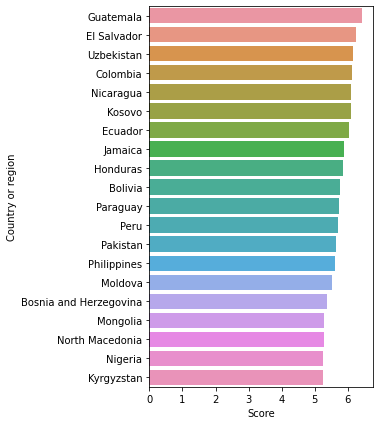

In [17]:
import seaborn as sns
plt.figure(figsize=(4, 7))
first_20 = gdp_between.head(20)
sns.barplot(data=first_20, y = 'Country or region', x = 'Score')
plt.show()

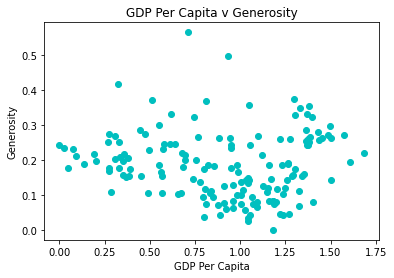

In [19]:
# 3.  
df_gdp = df['GDP per capita']
df_generosity = df['Generosity']

x = df_gdp.values
plt.xlabel('GDP Per Capita')
y = df_generosity.values
plt.ylabel('Generosity')
plt.title('GDP Per Capita v Generosity')
#each dot represents a country

plt.scatter(x, y, marker='o', color='c')
plt.show()

Surprisingly, there appears to be no correlation between GDP and generosity for this specific dataset. Many countries with high GDP are reported to have low generosity, while many countries with significantly low and significantly high GDP have higher generosity. 

Evaluating a histogram may give an easier view of this particular data.

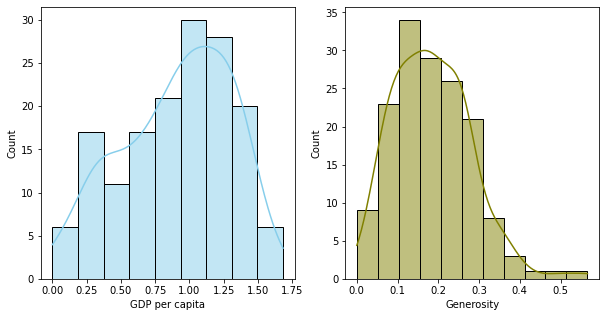

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(data=df['GDP per capita'], kde=True, color="skyblue", ax = axs[0])
sns.histplot(data=df['Generosity'], kde=True, color="olive", ax = axs[1])
plt.show()

The histogram that evaluates the GDP per capita shows a slightly left-skewed distribution, showing that the average GDP is actually on the higher end for the countries in the dataset. There are outliers shown, with the lower bound being less than 5 countries having a GDP above 1.50, while the upper bound shows that almost 30 countries contain a GDP of around 1.00, the average. 

The histogram that evaluates Generosity shows a strong right-skewed distribution, showing that more countries are actually *less* generous as the trend. There are outliers for high generosity, but this accounts for less than 5 countries, while most countries score between 0.1 and 0.2 for generosity. 

Neither of these evaluations shows a normal distribution curve, and the categories are not related, as GDP and generosity are of two different distribution types. It is actually quite surprising that countries with a high GDP aren't more generous - one may wonder if there are factors that explain this trend.

Overall, it appears that countries with higher happiness scores also rank high for social support, though these countries aren't exactly the most generous due to this. The most generous countries actually ranked quite low for happiness, with Myanmar being the lowest in this category, scoring 131 out of 156 for happiness, though the social support ranked well above the average, scoring 1.181 and having an average healthy life expectancy. 

Another top 5 generous country, Haiti, score exceptionally low across all categories, coming in at 147 out of 156. Interestingly, one of the *least* generous countries, Bostwana, ranked right after Haiti in happiness, scoring 148.  

About one-third of the dataset's countries has a GDP between 0.5 and 1.0, with Kenya and Myanmar being two of the top 5 most generous countries included in this category as well. Surprisingly, none of the least generous countries were included in this category. With some of the countries in this category having had humanitarian issues broadcasted within the last two decades, one may be curious about if these issues have affected their GDP. 

Surprisingly, it appears though that GDP does not have any direct correlation with generosity, as the two categories showed drastically different trends. Countries with a relatively high GDP actually showed to have a lower GDP, though the assumption that lower GDP means higher generosity could not be made. Across the board, most countries had a low generosity score in this dataset. 

From this report, what was unknown was the exact units used for each category, with each column value being represented by a float. Investigating the data source did not clear up any confusion or point toward an idea of the units used. Another unknown was the exact method used to calculate this overall Happiness Score - some countries shown to have correlations that drew from the score to high scores in other categories, while some countries had mismatching numbers in terms of their overall score and that of their other columns. It is unclear what exactly the score represents. 

GitHub: https://github.com/mckenziechurch/COMP-3800/blob/main/McKenzie%20Church%20Project%201.ipynb